# OBJECTIVE #

1.   <b>APPLYING RANDOM FOREST WITH TFIDF_WORD2VEC VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [0]:
from sklearn.model_selection import train_test_split          #importing the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import *
from sklearn import naive_bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn import *
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from tqdm import tqdm


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')#geeting the content from the google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
final_processed_data=pd.read_csv("gdrive/My Drive/final_new_data.csv")#loading the preprocessed data  with 100k points into dataframe 

In [4]:
# getting the counts of 0 and 1 in "SCORE" column to know whether it is unbalanced data or not
count_of_1=0
count_of_0=0
for i in final_processed_data['Score']:
   if i==1:
    count_of_1+=1
   else:
    count_of_0+=1
print(count_of_1)
print(count_of_0)
#it is an imbalanced dataset

88521
11479


In [0]:
#spliiting the data into train and test data
x_train,x_test,y_train,y_test=model_selection.train_test_split(final_processed_data['CleanedText'].values,final_processed_data['Score'].values,test_size=0.3,shuffle=False)

In [6]:
# Training my own Word2Vec model using your own text corpus
list_of_sent=[]
for sent in x_train:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_train[0])
print("*****************************************************************")
print(list_of_sent[0])
word_to_vector=Word2Vec(list_of_sent,min_count=5,size=100,workers=2)#constructing my our word to vector
w_t_c_words=list(word_to_vector.wv.vocab)
print("***********************************************************************")
print("sample words ", w_t_c_words[0:20])

witti littl book make son laugh loud recit car drive along alway sing refrain hes learn whale india droop love new word book introduc silli classic book will bet son still abl recit memori colleg
*****************************************************************
['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'recit', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'book', 'introduc', 'silli', 'classic', 'book', 'will', 'bet', 'son', 'still', 'abl', 'recit', 'memori', 'colleg']
***********************************************************************
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'hes', 'learn', 'india', 'droop', 'love', 'new', 'word', 'introduc']


In [7]:
###### NOW STARTING TFIDF WORD TO VEC FOR TRAIN DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
tf_idf_matrix = model.fit_transform(x_train)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
train_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf 
  if weight_sum != 0:
   sent_vec /= weight_sum
   train_tfidf_sent_vectors.append(sent_vec)

100%|██████████| 70000/70000 [01:52<00:00, 619.75it/s]


In [8]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_train_data=StandardScaler( with_mean=False).fit_transform(train_tfidf_sent_vectors)
print(x_train_data.shape)

(70000, 100)


In [9]:
list_of_sent=[]
for sent in x_test:
 list_of_sent.append(sent.split())#splitting of sentences into words AND appending them to list
print(x_test[0])
print("*****************************************************************")
print(list_of_sent[0])
print('*******************************************************************')

product carbon fruit juic high fructos corn syrup pack calori littl product prefer drink calori plain water tast wasnt pleas left unpleas aftertast also sweet drink made less thirst quencher
*****************************************************************
['product', 'carbon', 'fruit', 'juic', 'high', 'fructos', 'corn', 'syrup', 'pack', 'calori', 'littl', 'product', 'prefer', 'drink', 'calori', 'plain', 'water', 'tast', 'wasnt', 'pleas', 'left', 'unpleas', 'aftertast', 'also', 'sweet', 'drink', 'made', 'less', 'thirst', 'quencher']
*******************************************************************


In [10]:
###### NOW STARTING TFIDF WORD TO VEC FOR TEST DATA#################################################################
#NOW STARTING TF-IDF WEIGHTED WORD-TO-VEC
model = TfidfVectorizer()
model.fit_transform(x_train)
model.transform(x_test)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
test_tfidf_sent_vectors =[]# the tfidf-w2v for each sentence/review is stored in this list

for sent in tqdm(list_of_sent): # for each review/sentence
  sent_vec = np.zeros(100) # as word vectors are of zero length
  weight_sum =0; # num of words with a valid vector in the sentence/review
  for word in sent: # for each word in a review/sentence
   if word in w_t_c_words:
     vec = word_to_vector.wv[word]
     tf_idf = dictionary[word]*(sent.count(word)/len(sent))# dictionary[word] = idf value of word in whole courpus
     sent_vec += (vec * tf_idf)# sent.count(word) = tf valeus of word in this review
     weight_sum += tf_idf
  if weight_sum != 0:
   sent_vec /= weight_sum
   test_tfidf_sent_vectors.append(sent_vec)

100%|██████████| 30000/30000 [00:50<00:00, 594.46it/s]


In [12]:
from sklearn.preprocessing import StandardScaler #standarizing the training  data  
x_test_data=StandardScaler( with_mean=False).fit_transform(test_tfidf_sent_vectors)
print(x_test_data.shape)

(30000, 100)


In [0]:
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5) 
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5})
tuned_parameters=[{'max_depth':[20,30,40,50,60,80],'n_estimators':[21,30,40,50,70,100]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(rf, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


In [0]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data


CPU times: user 43 s, sys: 384 ms, total: 43.4 s
Wall time: 51min 7s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=5),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [20, 30, 40, 50, 60, 80], 'n_estimators': [21, 30, 40, 50, 70, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [0]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=80, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


In [0]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results.head()#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,12.983693,0.064387,0.943818,0.995695,20,21,"{'max_depth': 20, 'n_estimators': 21}",29,0.947023,0.997742,...,0.944010,0.996106,0.946641,0.994894,0.938817,0.993579,6.990797,0.007131,0.002993,0.001392
1,18.296815,0.089172,0.943961,0.996532,20,30,"{'max_depth': 20, 'n_estimators': 30}",23,0.946069,0.998846,...,0.945714,0.996710,0.944973,0.995763,0.940241,0.994425,9.894910,0.007289,0.002177,0.001454
2,24.447854,0.117207,0.944163,0.996857,20,40,"{'max_depth': 20, 'n_estimators': 40}",14,0.948039,0.999182,...,0.944864,0.996663,0.946589,0.996347,0.939667,0.994701,13.137854,0.008965,0.003095,0.001459
3,30.142504,0.138907,0.943967,0.997148,20,50,"{'max_depth': 20, 'n_estimators': 50}",21,0.946947,0.999278,...,0.944728,0.997427,0.947143,0.996634,0.939211,0.994815,16.159649,0.011941,0.003061,0.001450
4,42.804373,0.196317,0.943715,0.997414,20,70,"{'max_depth': 20, 'n_estimators': 70}",31,0.947809,0.999471,...,0.944465,0.997411,0.944404,0.996395,0.938875,0.995253,23.118533,0.023641,0.002888,0.001497


In [0]:

results['mean_test_score']=results['mean_test_score']*100
results=results.round(decimals=2)
results['cv_error_score']=100-results['mean_test_score']

# PLOTTING THE HEATMAP WITH  HYPERPARAMETERS FOR CV_ERROR SCORE 

In [0]:
test_score_heatmap=results.pivot(	'param_max_depth'	,'param_n_estimators','cv_error_score'	)

In [0]:
test_score_heatmap

param_n_estimators,21,30,40,50,70,100
param_max_depth,,,,,,
20,5.62,5.60,5.58,5.60,5.63,5.54
30,5.61,5.60,5.61,5.60,5.58,5.55
40,5.62,5.60,5.60,5.61,5.58,5.56
50,5.71,5.61,5.58,5.54,5.56,5.60
60,5.66,5.69,5.63,5.55,5.56,5.54
80,5.70,5.60,5.54,5.54,5.55,5.60


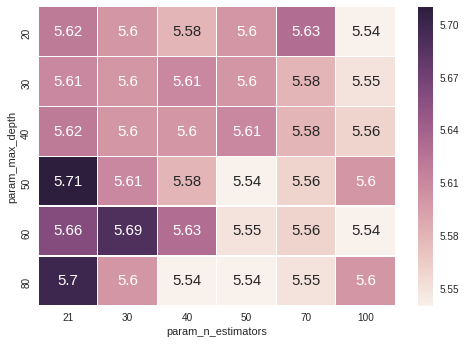

In [0]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [0]:
print(model.best_estimator_)#printing the best_estimator

RandomForestClassifier(bootstrap=True, class_weight={1: 0.5, 0: 0.5},
            criterion='gini', max_depth=80, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=80 AND N_ESTIMATORS=40

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

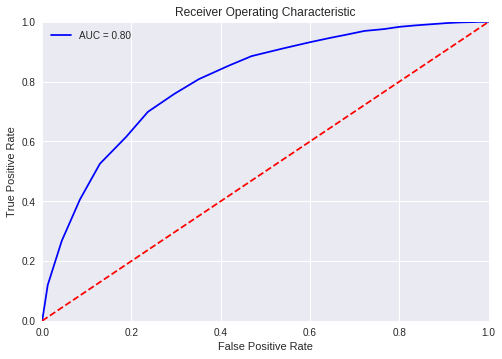

In [0]:
rf=RandomForestClassifier(criterion='gini',class_weight={1:.5,0:.5},max_depth=80 ,n_estimators=40)
rf.fit(x_train_data,y_train)#fitting the model 
probs = rf.predict_proba(x_test_data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#plotting the auc curve with best hyperparameters to get auc value
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [0]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  80.30889220018497


# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 88.497%
Precision on test set: 0.888
Recall on test set: 0.994
F1-Score on test set: 0.938
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



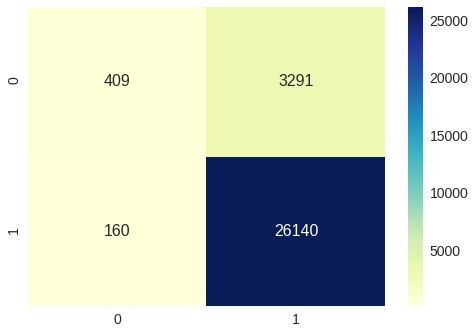

In [0]:
#Testing Accuracy on Test data  
import seaborn as sns #importing seaborn as sns
from sklearn.metrics import *#importing varoius metrics from sklearn
#building the model
y_pred = rf.predict(x_test_data) 
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g',cmap="YlGnBu")


# AVG WORD2VEC VECTORIZATION FOR RANDOM  FOREST IS COMPLETED 

# OBJECTIVE #

1.   <b>APPLYING GBDT WITH TFIDF_WORD2VEC VECTORIZATION

 *   FINDING THE BEST HYPERPARAMETER USING GRIDSEARCHCV WITH TRAIN DATA AND CROSS-VALIDATION DATA BY PLOTTING THE RESLUTS OF VAROIUS TRAIN DATA AND CROSS VALIDATION DATA
 * USING THE APROPRIATE VALUE OF HYPERPARAMETER ,TESTING ACCURACY ON TEST DATA
    USING F1-SCORE
 * PLOTTING THE CONFUSION MATRIX TO GET THE  PRECISOIN ,RECALL VALUE WITH HELP OF HEATMAP
  * PRINTING THE TOP 30 MOST IMPORTANT  FEATURES 
  


In [13]:
from xgboost import XGBClassifier
#biudling the model
#using time series split method for cross-validation score
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=2) 
xg=XGBClassifier(n_jobs=-1)
tuned_parameters=[{'max_depth':[20,30,40,50,80],'n_estimators':[30,40,50,70,100]}]
#applying the model of decision tree and using gridsearchcv to find the best hyper parameter
%time
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(xg, tuned_parameters, scoring = 'f1', cv=tscv,n_jobs=-1)#building the gridsearchcv model



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [14]:
%%time
model.fit(x_train_data, y_train)#fiitting the training data


CPU times: user 3min 55s, sys: 200 ms, total: 3min 55s
Wall time: 48min 21s


GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=2),
       error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'max_depth': [20, 30, 40, 50, 80], 'n_estimators': [30, 40, 50, 70, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [15]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


In [16]:
results=pd.DataFrame(model.cv_results_)# getting varoius cv_scores and train_scores various values of hyperparameter given as parameter and storing it in a dataframe
results.head()#printing the dataframe

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,56.692909,0.240994,0.943103,0.998652,20,30,"{'max_depth': 20, 'n_estimators': 30}",25,0.942904,0.998564,0.943303,0.998739,22.817108,0.020875,0.000200,0.000088
1,74.767461,0.288751,0.943172,0.999622,20,40,"{'max_depth': 20, 'n_estimators': 40}",24,0.943179,0.999641,0.943165,0.999603,31.492382,0.039201,0.000007,0.000019
2,86.954333,0.336272,0.944159,0.999964,20,50,"{'max_depth': 20, 'n_estimators': 50}",11,0.944510,1.000000,0.943808,0.999928,35.210752,0.022879,0.000351,0.000036
3,122.297282,0.449713,0.944691,1.000000,20,70,"{'max_depth': 20, 'n_estimators': 70}",6,0.945379,1.000000,0.944002,1.000000,51.638154,0.047013,0.000689,0.000000
4,160.436852,0.621527,0.944944,1.000000,20,100,"{'max_depth': 20, 'n_estimators': 100}",5,0.945565,1.000000,0.944324,1.000000,70.165256,0.061967,0.000621,0.000000


In [0]:
results['mean_test_score']=results['mean_test_score']*100

results=results.round(decimals=2)

results['cv_error_score']=100-results['mean_test_score']



# PLOTTING THE HEATMAP WITH HYPERPARAMETERS FOR CV_ERROR SCORE

In [18]:

test_score_heatmap=results.pivot( 'param_max_depth' ,'param_n_estimators','cv_error_score'  )

test_score_heatmap


param_n_estimators,30,40,50,70,100
param_max_depth,,,,,
20,5.69,5.68,5.58,5.53,5.51
30,5.62,5.61,5.63,5.54,5.47
40,5.63,5.60,5.60,5.54,5.48
50,5.63,5.60,5.60,5.54,5.48
80,5.63,5.60,5.60,5.54,5.48


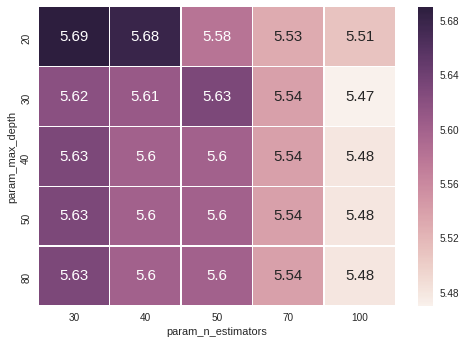

In [19]:
import seaborn as sns
sns.heatmap(test_score_heatmap,annot=True,annot_kws={"size": 15}, fmt='g',linewidths=.3)

In [20]:
print(model.best_estimator_)#printing the best_estimator

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)


# FROM THE ABOVE HEATMAPS RESULTS FOR  CV DATA,WE FOUND THAT BEST HYPERPARAMETERS AS MAX_DEPTH=30 AND N_ESTIMATORS=100

# PLOTTING THE ROC CURVE FOR GETTING AUC SCORE

In [21]:
xg=XGBClassifier(n_jobs=-1,max_depth=30 ,n_estimators=100)
xg.fit(x_train_data,y_train)#fitting the model 


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=30, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

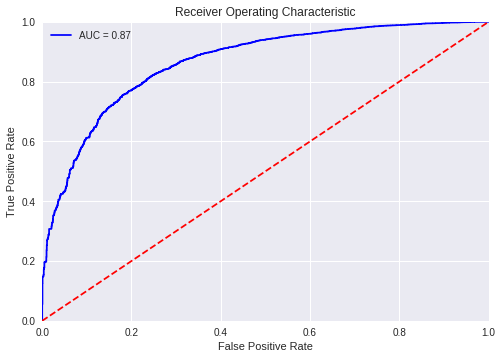

In [22]:
probs = xg.predict_proba(x_test_data)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'best')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [23]:
print('accuracy from the ROC curve is found as ',roc_auc*100)

accuracy from the ROC curve is found as  86.60876014798069


# TESTING OUR MODEL ON TEST DATA AND CHECKING ITS PRECISION ,RECALL ,F1_FCORE

Accuracy on test set: 89.213%
Precision on test set: 0.899
Recall on test set: 0.989
F1-Score on test set: 0.941
Confusion Matrix of test set:
 [ [TN  FP]
 [FN TP] ]



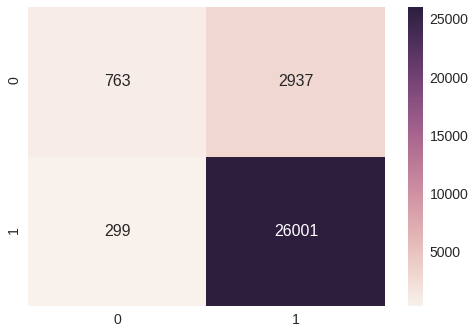

In [25]:
from sklearn.metrics import *
y_pred = xg.predict(x_test_data)
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, y_pred)*100))#printing accuracy
print("Precision on test set: %0.3f"%(precision_score(y_test, y_pred)))#printing precision score
print("Recall on test set: %0.3f"%(recall_score(y_test, y_pred))) #printing recall
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_pred))) 
print("Confusion Matrix of test set:\n [ [TN  FP]\n [FN TP] ]\n") 
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2)) #generating the heatmap for confusion matrix
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')


# TFIDF WORD2VEC VECTORIZATION IS COMPLETED FOR GBDT

# COMPARING ALL MODELS PERFORMANCE WITH DIFFERENT VECTORIZATIONS

In [2]:
from tabulate import tabulate

In [9]:
print("PERFORMANCE EVALUATION for RANDOM FOREST FOR ALL VECTORIZATIONS")
table = [["BOW",'77','35','93.5%','86.3%'],["TF-IDF",'73','21','93.2%','85.6%'], ["AVG_WORD_2_VEC",'80','70','94.1%','84.1%'],["TFIDF_AVG_WORD_2_VEC",80,40,'93.1%','80.1%']]
headers=['VECTORIZATION','MAX_DEPTH','N_ESTIMATORS','F1_SCORE','ACCURACY']
print (tabulate(table, headers, tablefmt="fancy_grid"))

PERFORMANCE EVALUATION for RANDOM FOREST FOR ALL VECTORIZATIONS
╒══════════════════════╤═════════════╤════════════════╤════════════╤════════════╕
│ VECTORIZATION        │   MAX_DEPTH │   N_ESTIMATORS │ F1_SCORE   │ ACCURACY   │
╞══════════════════════╪═════════════╪════════════════╪════════════╪════════════╡
│ BOW                  │          77 │             35 │ 93.5%      │ 86.3%      │
├──────────────────────┼─────────────┼────────────────┼────────────┼────────────┤
│ TF-IDF               │          73 │             21 │ 93.2%      │ 85.6%      │
├──────────────────────┼─────────────┼────────────────┼────────────┼────────────┤
│ AVG_WORD_2_VEC       │          80 │             70 │ 94.1%      │ 84.1%      │
├──────────────────────┼─────────────┼────────────────┼────────────┼────────────┤
│ TFIDF_AVG_WORD_2_VEC │          80 │             40 │ 93.1%      │ 80.1%      │
╘══════════════════════╧═════════════╧════════════════╧════════════╧════════════╛


In [10]:
print("PERFORMANCE EVALUATION for XG BOOST FOR ALL VECTORIZATIONS")
table = [["BOW",'27','50','87.9%','94.2%'],["TF-IDF",'30','50','94.6%','87.3%'], ["AVG_WORD_2_VEC",'40','100','94.4%','88.6%'],["TFIDF_AVG_WORD_2_VEC",30,100,'94.9%','86.6%']]
headers=['VECTORIZATION','MAX_DEPTH','N_ESTIMATORS','F1_SCORE','ACCURACY']
print (tabulate(table, headers, tablefmt="fancy_grid"))

PERFORMANCE EVALUATION for XG BOOST FOR ALL VECTORIZATIONS
╒══════════════════════╤═════════════╤════════════════╤════════════╤════════════╕
│ VECTORIZATION        │   MAX_DEPTH │   N_ESTIMATORS │ F1_SCORE   │ ACCURACY   │
╞══════════════════════╪═════════════╪════════════════╪════════════╪════════════╡
│ BOW                  │          27 │             50 │ 87.9%      │ 94.2%      │
├──────────────────────┼─────────────┼────────────────┼────────────┼────────────┤
│ TF-IDF               │          30 │             50 │ 94.6%      │ 87.3%      │
├──────────────────────┼─────────────┼────────────────┼────────────┼────────────┤
│ AVG_WORD_2_VEC       │          40 │            100 │ 94.4%      │ 88.6%      │
├──────────────────────┼─────────────┼────────────────┼────────────┼────────────┤
│ TFIDF_AVG_WORD_2_VEC │          30 │            100 │ 94.9%      │ 86.6%      │
╘══════════════════════╧═════════════╧════════════════╧════════════╧════════════╛


##   #####RANDOM FOREST AND XG_BOOST IS COMPLETED FOR ALL 4 VECTORIZATIONS  ###

In [12]:
print("### RANDOM FOREST AND XG_BOOST IS COMPLETED FOR ALL 4 VECTORIZATIONS")

### RANDOM FOREST AND XG_BOOST IS COMPLETED FOR ALL 4 VECTORIZATIONS
